In [1]:
# Pymaceuticals Inc.


### Analysis

####-	•	Capomulin's Potential: The data suggests that Capomulin might have a positive effect on tumor volume compared to other treatments, but a more comprehensive analysis is needed.
####-   •	Mouse Weight Correlation: There's a potential correlation between mouse weight and tumor volume, suggesting heavier mice might have larger tumors.


 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 5\Module 5; Class Challenge\pymaceuticals-challenge\Pymaceuticals\data\mouse_metadata.csv"
study_results_path = r"C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 5\Module 5; Class Challenge\pymaceuticals-challenge\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print(merged_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [3]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()

print(f"\nNumber of mice in the data: {num_mice}")


Number of mice in the data: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Find duplicate mice by ID and Timepoint
duplicate_mice = merged_data.groupby(['Mouse ID', 'Timepoint'])['Timepoint'].transform('count') > 1
duplicate_mice_df = merged_data[duplicate_mice]

# Optional: Get all the data for the duplicate mouse ID.
if len(duplicate_mice_df) > 0:
    print("Duplicate Mice by ID and Timepoint:")
    print(duplicate_mice_df)
else:
    print("No duplicate mice found by ID and Timepoint.")

Duplicate Mice by ID and Timepoint:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice_data = pd.Series(duplicate_mice_df['Mouse ID'])
unique_values = duplicate_mice_data.unique()
cleaned_data = merged_data[merged_data['Mouse ID'] != unique_values[0]]
print("\nCleaned DataFrame:")
cleaned_data


Cleaned DataFrame:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_data['Mouse ID'].nunique()
print(f"\nNumber of mice in the clean DataFrame: {num_mice}")


Number of mice in the clean DataFrame: 248


In [7]:
## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_summary = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', lambda x: st.sem(x))  
)

# Assemble the resulting series into a single summary DataFrame.
# Display the summary DataFrame
print("\nSummary Statistics of Tumor Volume by Drug Regimen:")
regimen_summary


Summary Statistics of Tumor Volume by Drug Regimen:


,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
alt_regimen_summary = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', lambda x: st.sem(x))  
)

# Display the summary DataFrame
print("\nSummary Statistics of Tumor Volume by Drug Regimen:")
alt_regimen_summary


Summary Statistics of Tumor Volume by Drug Regimen:


,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
## Bar and Pie Charts

<Figure size 800x600 with 0 Axes>

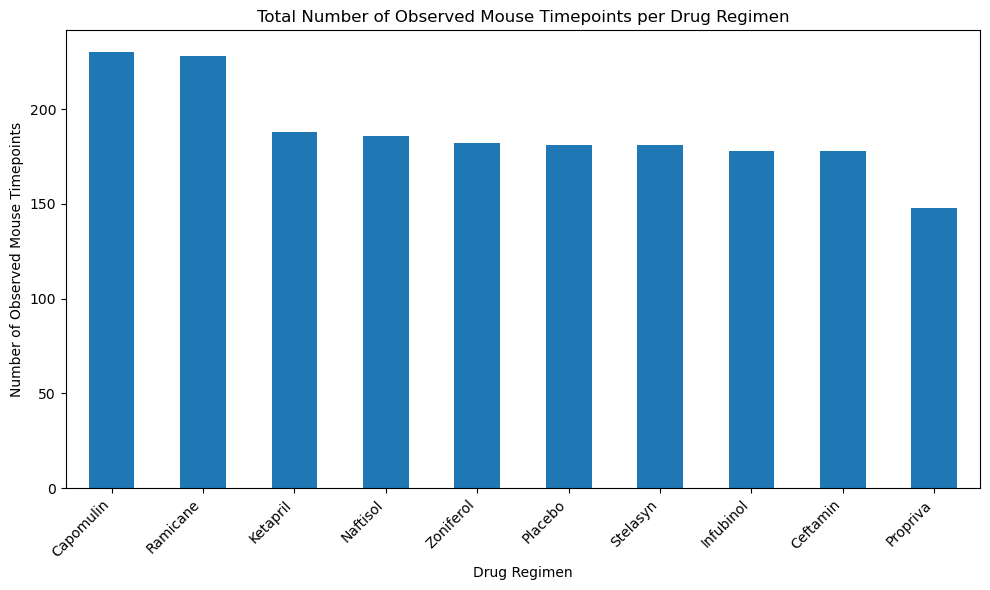

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a DataFrame to hold the counts
df_counts = pd.DataFrame({
    'Drug Regimen': regimen_counts.index,
    'Number of Observed Mouse Timepoints': regimen_counts.values
})

# Plot the data using pandas
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
df_counts.plot(kind='bar', x='Drug Regimen', y='Number of Observed Mouse Timepoints', 
               legend=False, figsize=(10, 6), title='Total Number of Observed Mouse Timepoints per Drug Regimen')

# Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Show the plot
plt.show()

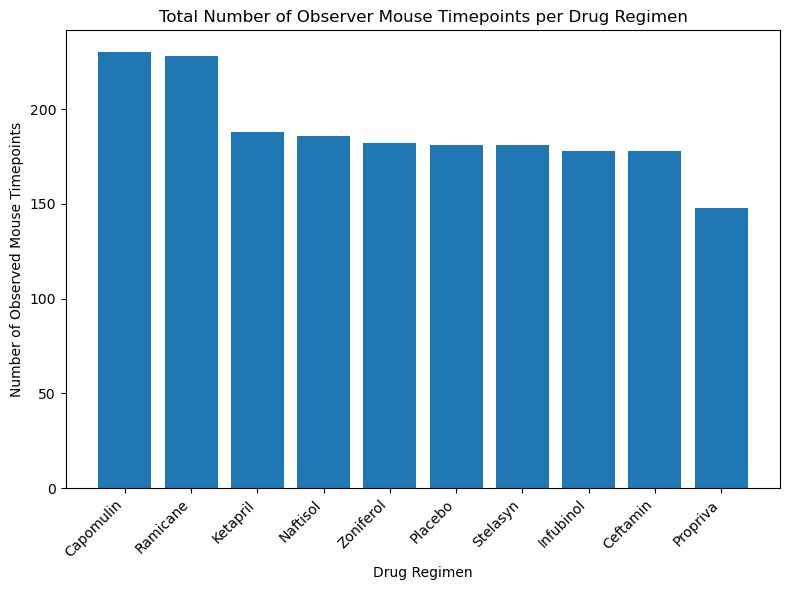

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Number of Observer Mouse Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

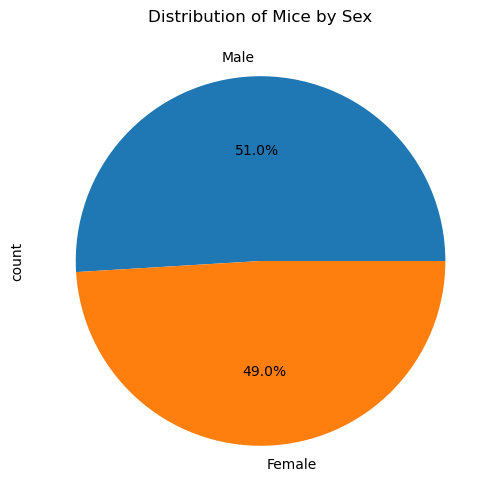

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = cleaned_data['Sex'].value_counts()
# Create a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6)) 
plt.ylabel('count') # Add y-label (even though it's a pie chart, it's good practice)
plt.title('Distribution of Mice by Sex') # Optional: Add a title
plt.show()

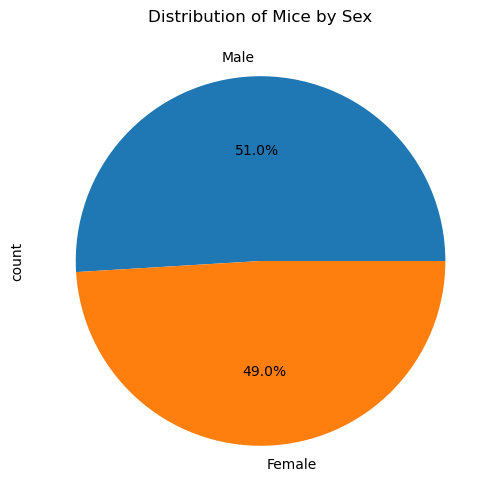

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = cleaned_data['Sex'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
# Make the pie chart
plt.figure(figsize=(6, 6)) # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel('count')
plt.title('Distribution of Mice by Sex') # Optional title
plt.show()

In [15]:
## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_last_tp = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

merged_last_tp.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Filter for the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_last_tp[merged_last_tp['Drug Regimen'].isin(treatments)]


# Create an empty list to fill with tumor vol data (for plotting later)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = filtered_data[filtered_data['Drug Regimen'] == treatment]
    tumor_volumes = subset['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"\n{treatment} IQR data:")
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")


    # Identify outliers and get corresponding information (including index)
    outliers = subset[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    if not outliers.empty:
        print(f"Potential outliers for {treatment}:")
        for index, row in outliers.iterrows(): # Use .iterrows() to get index
            print(f"  Index: {index}, Mouse ID: {row['Mouse ID']}, Timepoint: {row['Timepoint']}, Tumor Volume: {row['Tumor Volume (mm3)']}")

    else:
        print(f"No potential outliers found for {treatment}.")


Capomulin IQR data:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.
No potential outliers found for Capomulin.

Ramicane IQR data:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
No potential outliers found for Ramicane.

Infubinol IQR data:
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Potential outliers for Infubin

C:\Users\asg_a_1p8y6mm\AppData\Local\Temp\ipykernel_39004\1587156993.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)  # Add flierprops


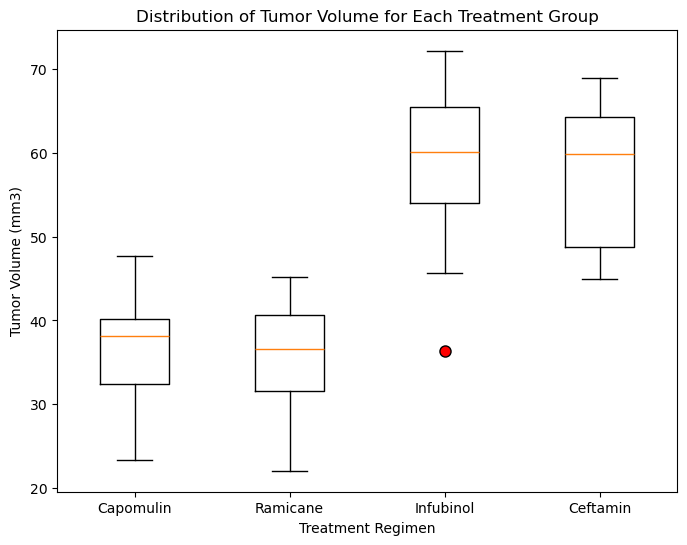

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))

# Customize the boxplot appearance to highlight outliers in red:
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor='black')

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)  # Add flierprops

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [19]:
## Line and Scatter Plots

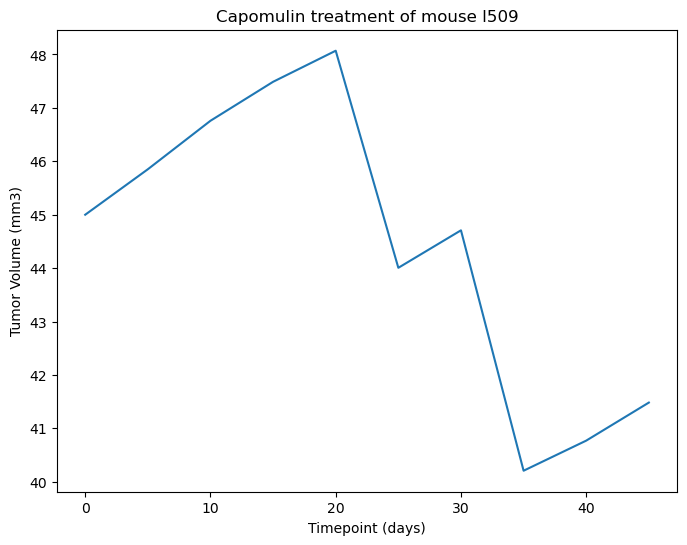

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for mouse I509
mouse_i509_data = cleaned_data[cleaned_data['Mouse ID'] == 'l509'] # typo in question l not I

# Generate the line plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(mouse_i509_data['Timepoint'], mouse_i509_data['Tumor Volume (mm3)']) 


plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

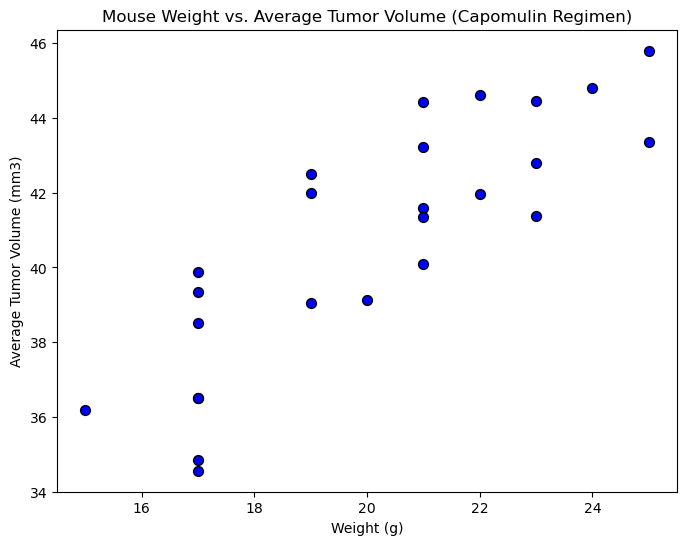

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()  # Get the first weight for each mouse

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=50)


plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


In [22]:
## Correlation and Regression


The correlation between mouse weight and the average tumor volume is 0.84


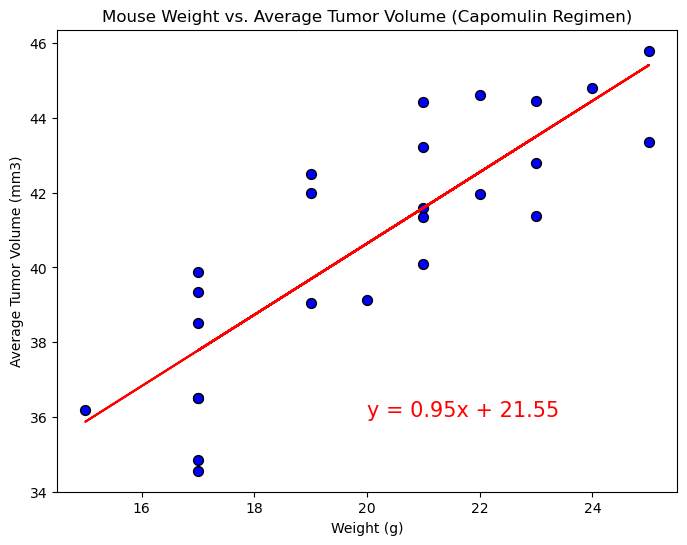

In [23]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = round(st.pearsonr(mouse_weights, avg_tumor_volume)[0],2)

print(f"\nThe correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights,avg_tumor_volume)
regress_values = mouse_weights * slope + intercept

# Create the scatter plot with linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=50)
plt.plot(mouse_weights, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [ ]:
## Addendum (a look at all drugs)

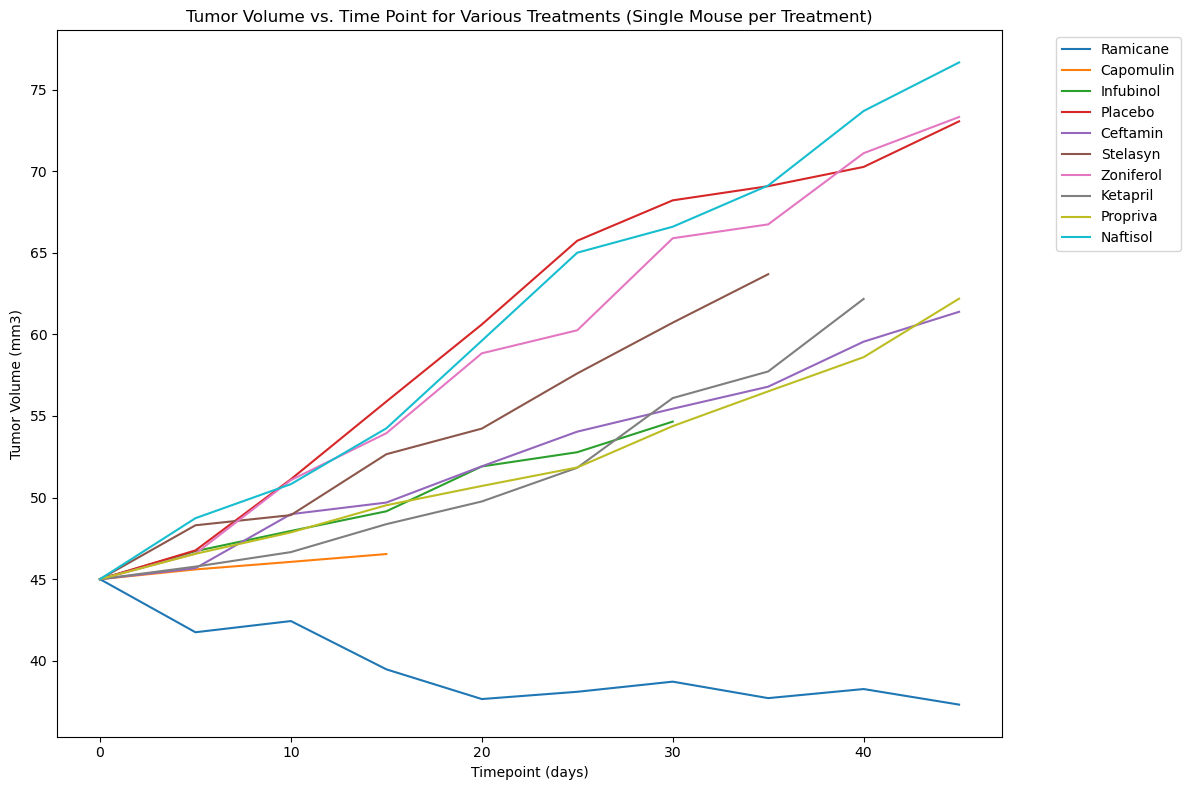

C:\Users\asg_a_1p8y6mm\AppData\Local\Temp\ipykernel_39004\4279885512.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(treatments))  # Get colormap
C:\Users\asg_a_1p8y6mm\AppData\Local\Temp\ipykernel_39004\4279885512.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(treatments))  # Get colormap
C:\Users\asg_a_1p8y6mm\AppData\Local\Temp\ipykernel_39004\4279885512.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplo

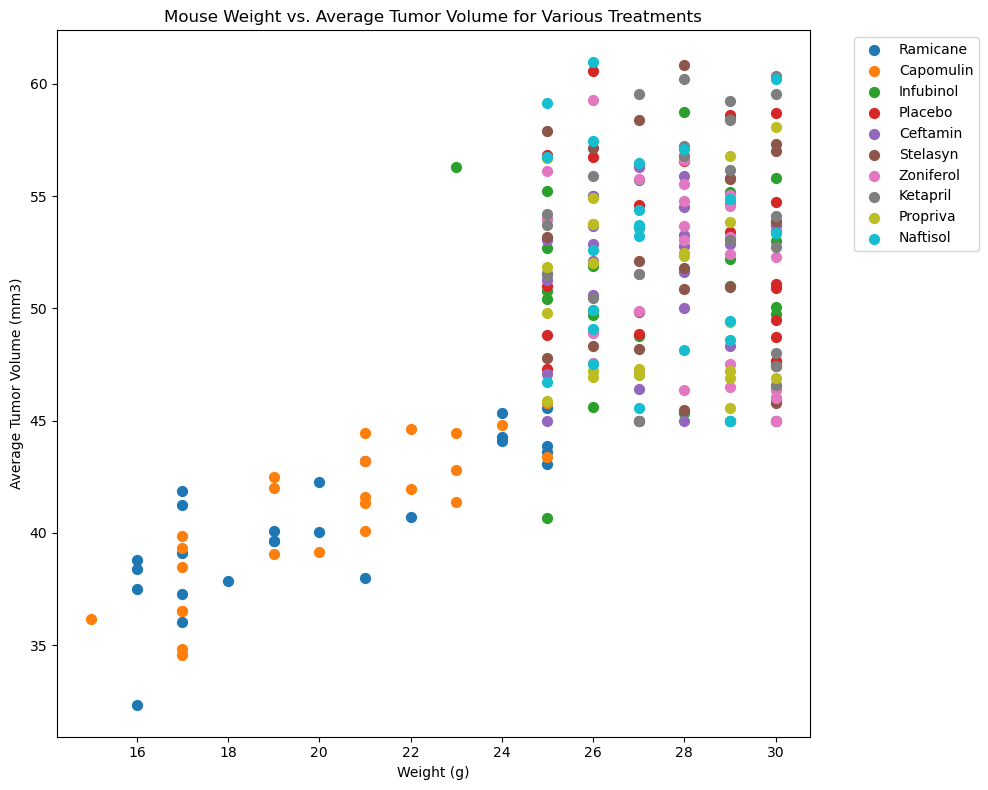


Correlation between mouse weight and average tumor volume for Ramicane: 0.81


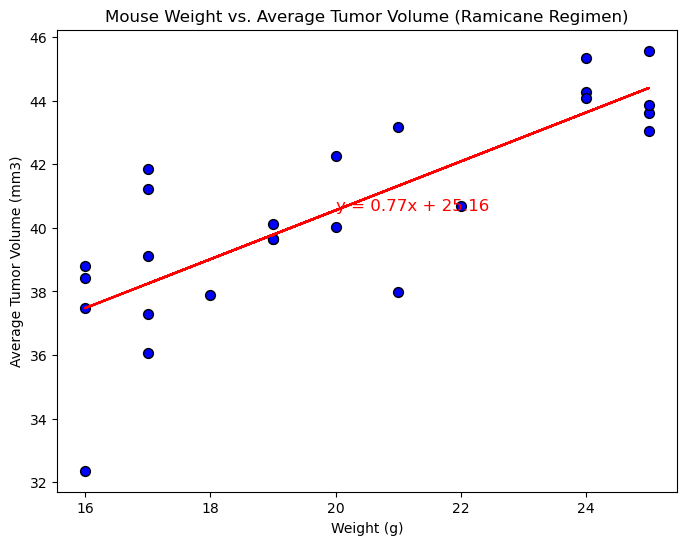


Correlation between mouse weight and average tumor volume for Capomulin: 0.84


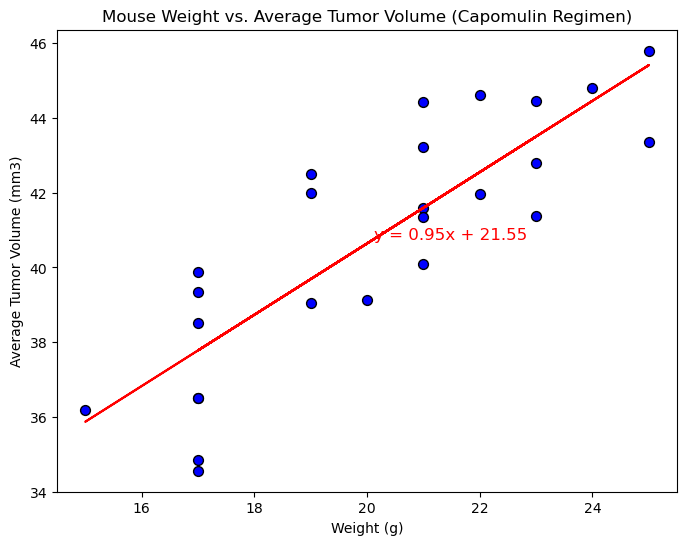


Correlation between mouse weight and average tumor volume for Infubinol: -0.06


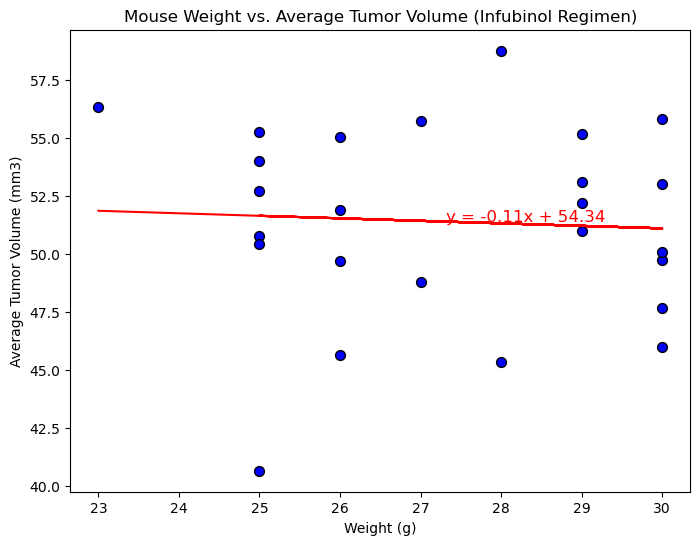


Correlation between mouse weight and average tumor volume for Placebo: -0.17


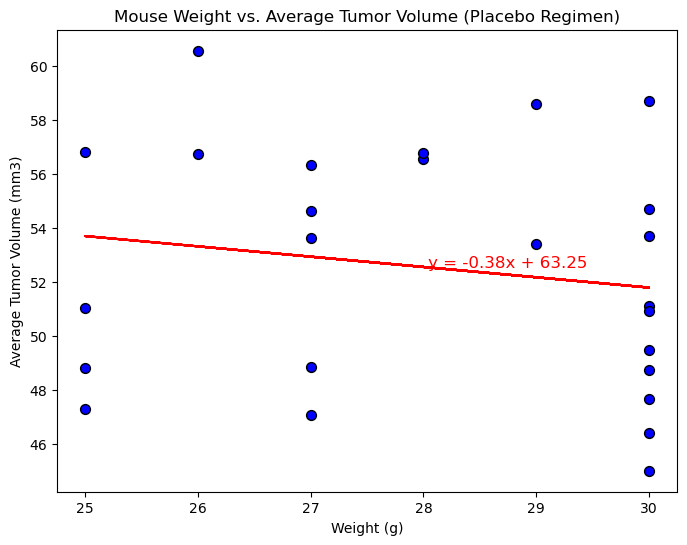


Correlation between mouse weight and average tumor volume for Ceftamin: -0.04


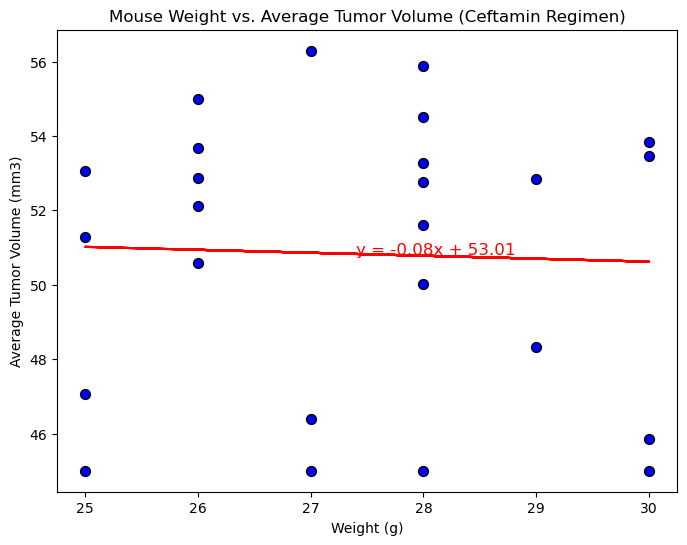


Correlation between mouse weight and average tumor volume for Stelasyn: 0.08


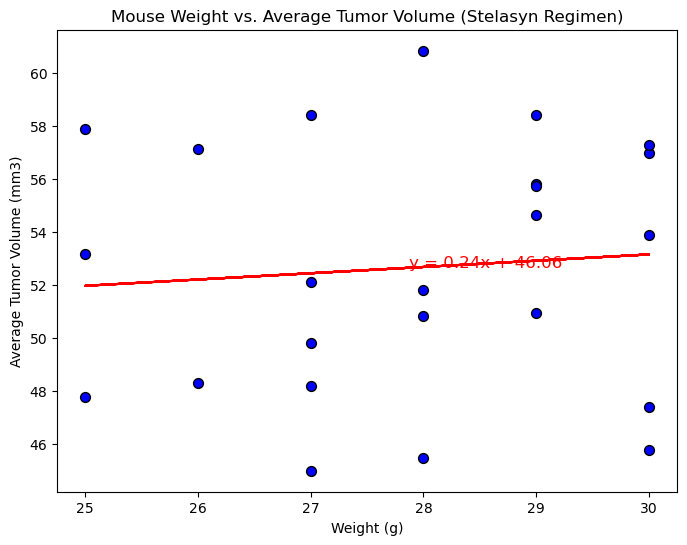


Correlation between mouse weight and average tumor volume for Zoniferol: -0.36


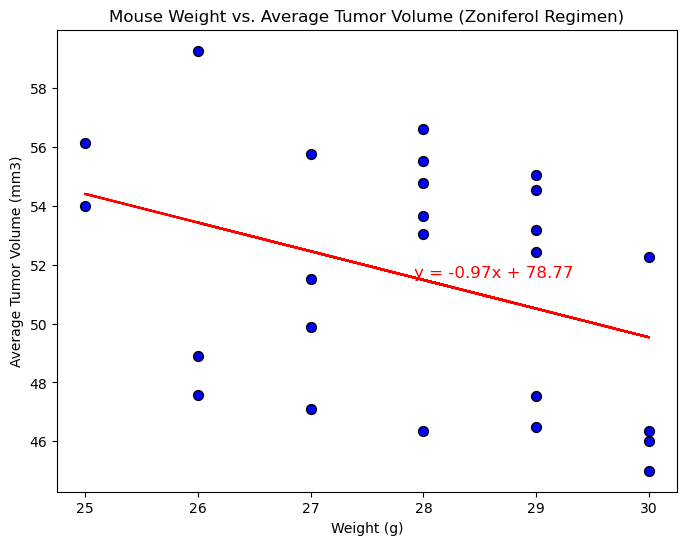


Correlation between mouse weight and average tumor volume for Ketapril: -0.02


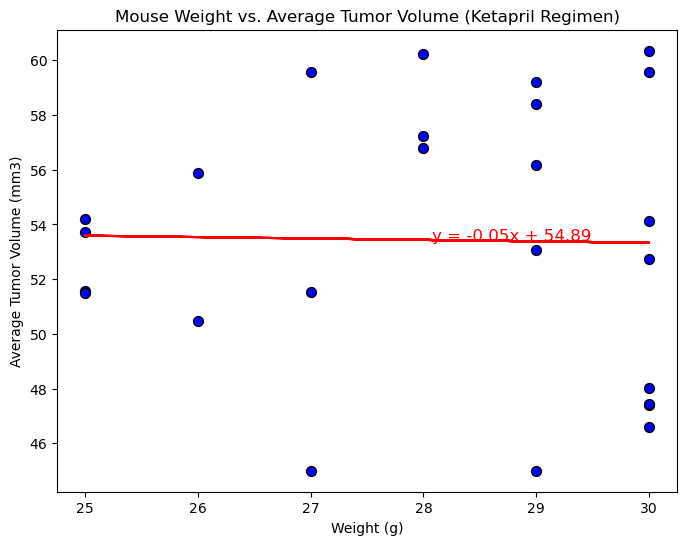


Correlation between mouse weight and average tumor volume for Propriva: -0.07


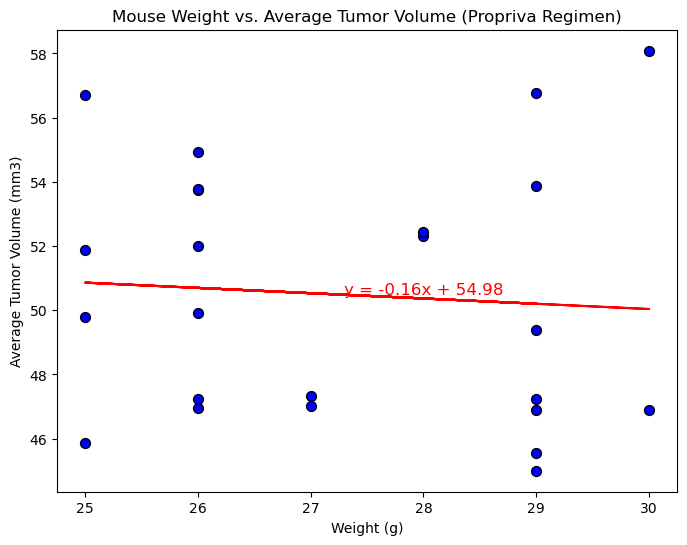


Correlation between mouse weight and average tumor volume for Naftisol: -0.15


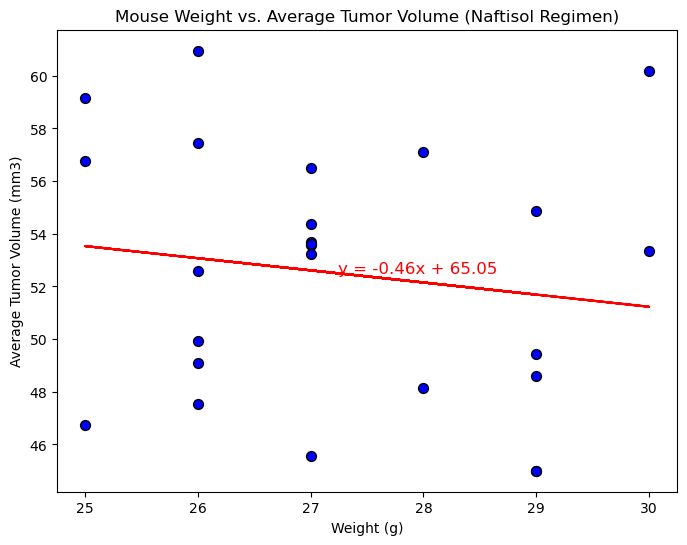

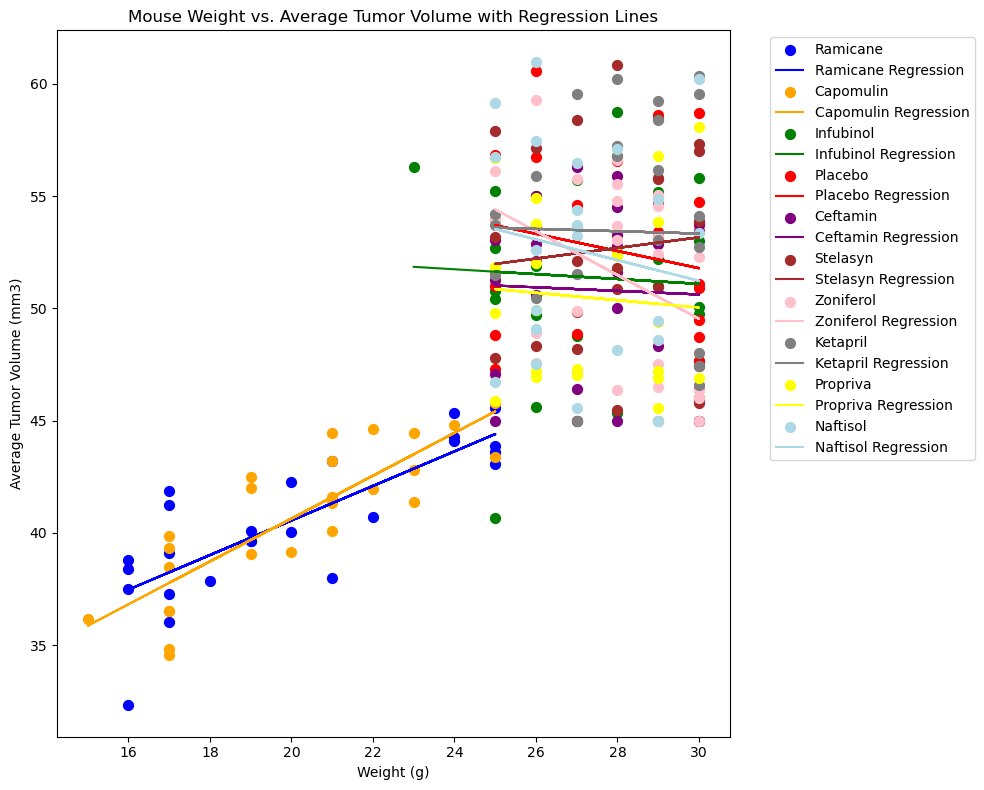

In [136]:
# Dependency on colormap
import matplotlib.cm as cm

# Treatments for combined analysis
treatments = cleaned_data['Drug Regimen'].unique()

# Line Plot (Tumor Volume vs. Time Point for all treatments)
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability

for treatment in treatments:
    treatment_data = cleaned_data[cleaned_data['Drug Regimen'] == treatment]
    # Get a random mouse from each treatment group for illustration (avoids overplotting)
    random_mouse = treatment_data['Mouse ID'].sample(1).iloc[0]
    mouse_data = treatment_data[treatment_data['Mouse ID'] == random_mouse]

    plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], label=treatment)

plt.title('Tumor Volume vs. Time Point for Various Treatments (Single Mouse per Treatment)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1)) # Place legend outside the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Scatter Plot (Mouse Weight vs. Average Tumor Volume for all treatments)
plt.figure(figsize=(10, 8))

for treatment in treatments:
    treatment_data = cleaned_data[cleaned_data['Drug Regimen'] == treatment]
    avg_tumor_volume = treatment_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
    mouse_weights = treatment_data.groupby('Mouse ID')['Weight (g)'].first()

    cmap = cm.get_cmap('viridis', len(treatments))  # Get colormap
    color = cmap(i)
    scatter_colors[treatment] = color  # Store color
    
    plt.scatter(mouse_weights, avg_tumor_volume, marker='o', label=treatment, s=50)



plt.title('Mouse Weight vs. Average Tumor Volume for Various Treatments')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1)) #Legend outside of plot for readability
plt.tight_layout()  # Adjust layout
plt.show()


# Correlation and Regression (for each treatment)
for treatment in treatments:
    treatment_data = cleaned_data[cleaned_data['Drug Regimen'] == treatment]
    avg_tumor_volume = treatment_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
    mouse_weights = treatment_data.groupby('Mouse ID')['Weight (g)'].first()
    
    correlation_coefficient = round(st.pearsonr(mouse_weights, avg_tumor_volume)[0], 2)
    print(f"\nCorrelation between mouse weight and average tumor volume for {treatment}: {correlation_coefficient:.2f}")
    
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, avg_tumor_volume)
    regress_values = mouse_weights * slope + intercept

    plt.figure(figsize=(8, 6))
    plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=50)
    plt.plot(mouse_weights, regress_values, "r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (mouse_weights.mean(), avg_tumor_volume.mean()), fontsize=12, color="red") # Dynamic annotation placement
    plt.title(f'Mouse Weight vs. Average Tumor Volume ({treatment} Regimen)')
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    plt.show()

# Combined Regression Plot (Single plot for all drugs)
plt.figure(figsize=(10, 8))

# Get color map
treatments = list(scatter_colors.keys())

for treatment in treatments:
    treatment_data = cleaned_data[cleaned_data['Drug Regimen'] == treatment]
    avg_tumor_volume = treatment_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
    mouse_weights = treatment_data.groupby('Mouse ID')['Weight (g)'].first()
    
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, avg_tumor_volume)
    regress_values = mouse_weights * slope + intercept

    plt.scatter(mouse_weights, avg_tumor_volume, marker='o', label=treatment, s=50, color=color_map[treatment])
    plt.plot(mouse_weights, regress_values, color=color_map[treatment], label=f"{treatment} Regression")

plt.title('Mouse Weight vs. Average Tumor Volume with Regression Lines')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # Legend outside for better readability
plt.tight_layout()
plt.show()